In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
import pandas as pd
# Cargar el archivo como un DataFrame
data = pd.read_csv("/home/adrian.perez/Documents/OceanWave/HDP-GPC/hdpgpc/data/ocean/VES3_spectra.txt", header=None)
data = data.iloc[1:, :]
# Verificar las dimensiones del DataFrame
print("Dimensiones:", data.shape)
display(data.head())

Dimensiones: (14376, 512)


,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
1,0.000023,0.000751,0.000096,0.000017,0.000002,0.000006,0.000043,0.000022,0.000012,0.000019,...,0.000067,0.000066,0.000066,0.000065,0.000065,0.000064,0.000064,0.000063,0.000063,0.000062
2,0.000015,0.000132,0.000039,0.000010,0.000004,0.000055,0.000018,0.000030,0.000012,0.000012,...,0.000024,0.000023,0.000023,0.000023,0.000023,0.000023,0.000022,0.000022,0.000022,0.000022
3,0.000008,0.000439,0.000126,0.000028,0.000002,0.000002,0.000010,0.000018,0.000174,0.000009,...,0.001540,0.001528,0.001516,0.001504,0.001492,0.001480,0.001469,0.001457,0.001446,0.001435
4,0.000014,0.000075,0.000170,0.000054,0.000045,0.000007,0.000005,0.000029,0.000077,0.000080,...,0.001266,0.001256,0.001246,0.001236,0.001226,0.001217,0.001207,0.001198,0.001189,0.001179
5,0.000002,0.000401,0.000511,0.000030,0.000104,0.000011,0.000018,0.000024,0.000075,0.000031,...,0.000096,0.000095,0.000094,0.000094,0.000093,0.000092,0.000091,0.000091,0.000090,0.000089


In [5]:
import numpy as np

# Generar las frecuencias de 0.040039 a 0.5 Hz con intervalos de 1/1024 Hz
frequencies = np.arange(1/1024, 0.5 + 1/1024, 1/1024)

print("Frecuencias:", frequencies)
print("Número de frecuencias:", len(frequencies))  # Debería ser 472

Frecuencias: [0.00097656 0.00195312 0.00292969 0.00390625 0.00488281 0.00585938
 0.00683594 0.0078125  0.00878906 0.00976562 0.01074219 0.01171875
 0.01269531 0.01367188 0.01464844 0.015625   0.01660156 0.01757812
 0.01855469 0.01953125 0.02050781 0.02148438 0.02246094 0.0234375
 0.02441406 0.02539062 0.02636719 0.02734375 0.02832031 0.02929688
 0.03027344 0.03125    0.03222656 0.03320312 0.03417969 0.03515625
 0.03613281 0.03710938 0.03808594 0.0390625  0.04003906 0.04101562
 0.04199219 0.04296875 0.04394531 0.04492188 0.04589844 0.046875
 0.04785156 0.04882812 0.04980469 0.05078125 0.05175781 0.05273438
 0.05371094 0.0546875  0.05566406 0.05664062 0.05761719 0.05859375
 0.05957031 0.06054688 0.06152344 0.0625     0.06347656 0.06445312
 0.06542969 0.06640625 0.06738281 0.06835938 0.06933594 0.0703125
 0.07128906 0.07226562 0.07324219 0.07421875 0.07519531 0.07617188
 0.07714844 0.078125   0.07910156 0.08007812 0.08105469 0.08203125
 0.08300781 0.08398438 0.08496094 0.0859375  0.086914

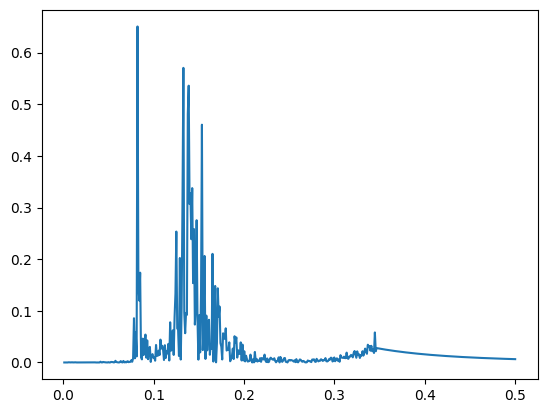

In [6]:
em = data.iloc[40]
plt.plot(frequencies, em)

In [7]:
def block_average(row, block_size=3):
    return np.mean(row.values[:len(row)//block_size*block_size].reshape(-1, block_size), axis=1)

def block_average_freq(freq, block_size=3):
    return np.mean(freq[:len(freq)//block_size*block_size].reshape(-1, block_size), axis=1)

In [8]:
copia = data.copy()

In [9]:
three_point_block = copia.apply(block_average, block_size=3, axis=1)
three_point_block = pd.DataFrame(three_point_block.tolist())

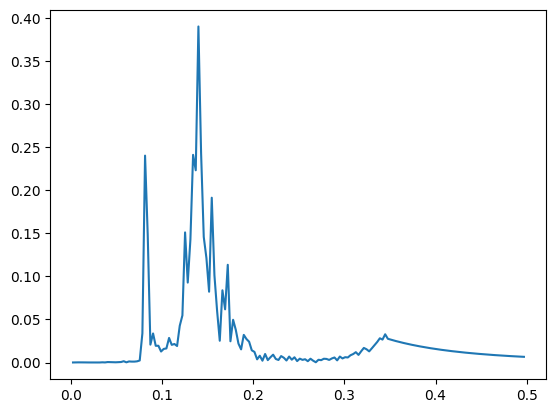

In [10]:
new_frequencies = block_average_freq(frequencies, block_size=3)
em = three_point_block.iloc[40]
plt.plot(new_frequencies, em)
np.save("/home/adrian.perez/Documents/OceanWave/HDP-GPC/hdpgpc/data/ocean/freq_2.npy", new_frequencies)

In [12]:
print("2-point rolling mean")
block_smooth = three_point_block.apply(lambda col: np.convolve(col, [0.5, 0.5], mode='same'))
block_smooth_2 = three_point_block.apply(lambda col: np.convolve(col, [0.5, 0.5], mode='same'))


2-point rolling mean


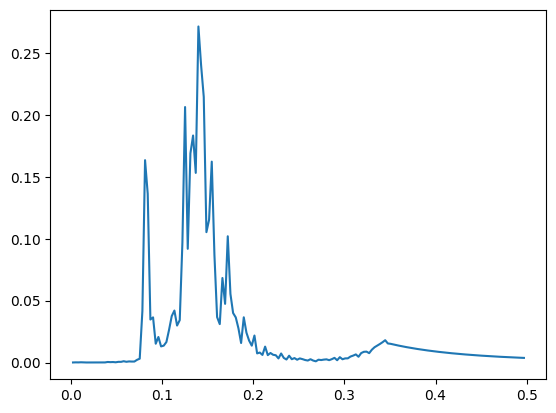

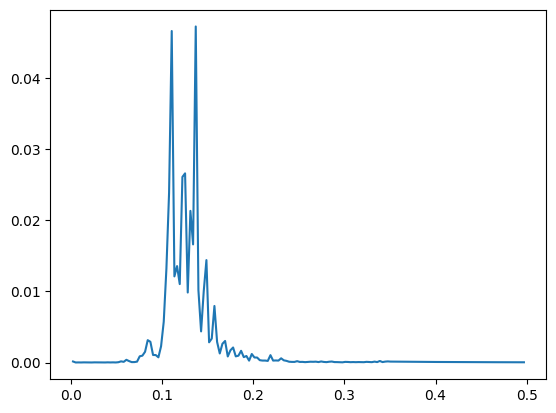

0      0.000145
1      0.000004
2      0.000013
3      0.000006
4      0.000019
         ...   
165    0.000035
166    0.000034
167    0.000033
168    0.000033
169    0.000032
Name: 0, Length: 170, dtype: float64


In [14]:
plt.figure()
plt.plot(new_frequencies, block_smooth_2.iloc[40])
plt.show()
plt.figure()
plt.plot(new_frequencies, block_smooth_2.iloc[0])
plt.show()

print(block_smooth_2.iloc[0])

In [16]:
np.save("/home/adrian.perez/Documents/OceanWave/HDP-GPC/hdpgpc/data/ocean/VES3_2.npy", block_smooth_2.to_numpy())